Revisión de variables de Sotano, interiorires, Garaje, Extras y Venta

Carga inicial del dataset

In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
#carga inicial del dataset

import pandas as pd
from housing_price_prediction.utils.paths import data_raw_dir

train_path = data_raw_dir() / "train.csv"
df = pd.read_csv(train_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64


Text(0.5, 1.0, 'Relación entre BsmtQual y SalePrice')

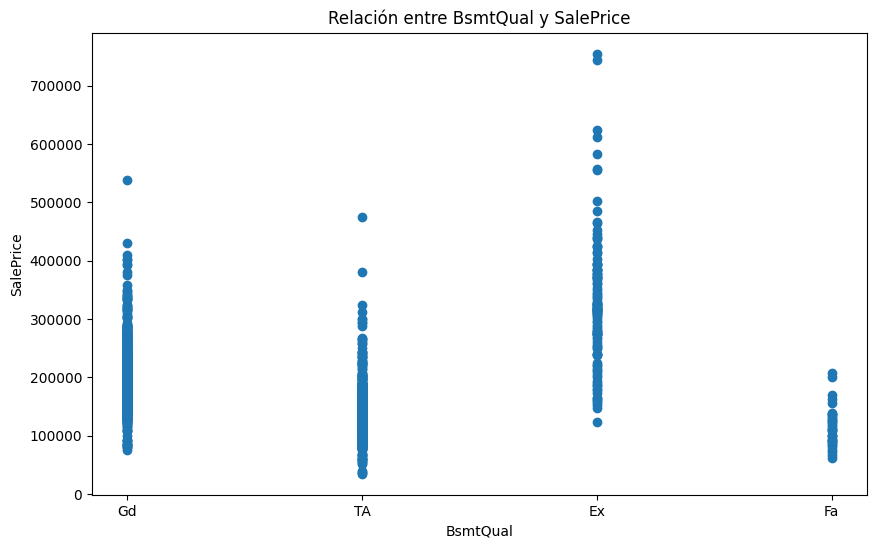

In [66]:
print(df["BsmtQual"].value_counts())
df_sinNull = df[df['BsmtQual'].notnull()]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df_sinNull['BsmtQual'], df_sinNull['SalePrice'])
plt.xlabel('BsmtQual')
plt.ylabel('SalePrice')
plt.title('Relación entre BsmtQual y SalePrice')

Rellenar los valores nulos de BsmtQual con NA (No Basement)


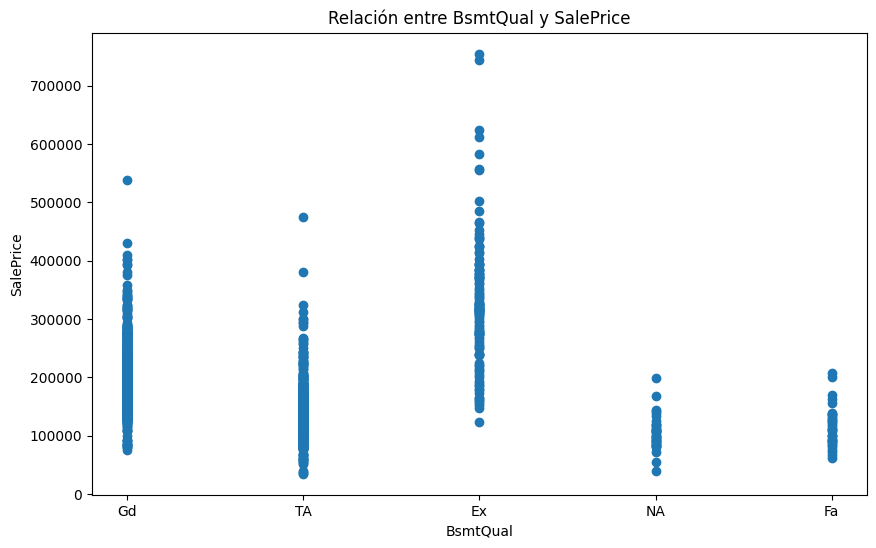

In [67]:
print("Rellenar los valores nulos de BsmtQual con NA (No Basement)")
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
plt.figure(figsize=(10,6))
plt.scatter(df['BsmtQual'], df['SalePrice'])
plt.xlabel('BsmtQual')
plt.ylabel('SalePrice')
plt.title('Relación entre BsmtQual y SalePrice')
plt.show()
# Cambiar los valores de BsmtQual a números para análisis cuantitativo
df['BsmtQual'] = df['BsmtQual'].map({'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [68]:
# Aplicar lo mismo para BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].map({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4})
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].map({'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})


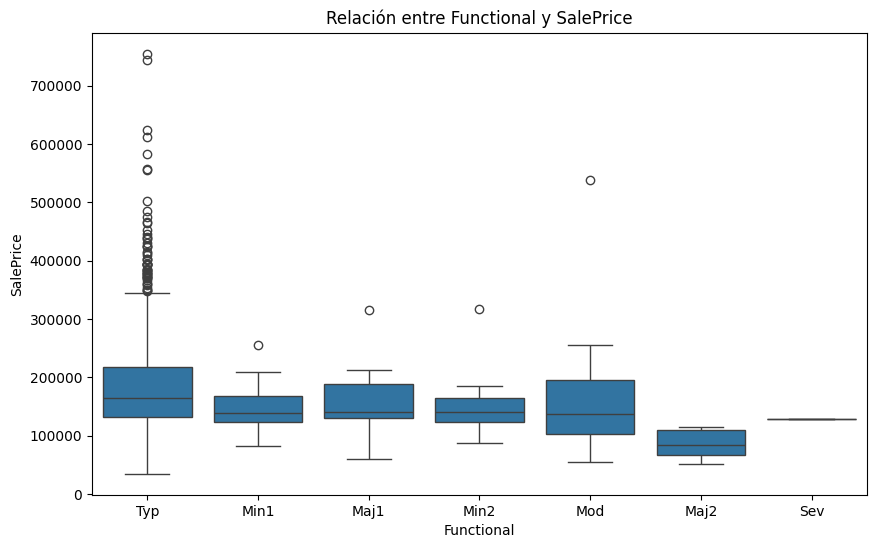

In [69]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='Functional', y='SalePrice', data=df)
plt.xlabel('Functional')
plt.ylabel('SalePrice')
plt.title('Relación entre Functional y SalePrice') 
plt.show()

In [70]:
#Convertir KitchenQual a valores numéricos
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1})

In [71]:
# convertir Functional a valores numéricos con label encoding
df['Functional'] = df['Functional'].map({
    "Sev": 0,
    "Maj2": 1,
    "Maj1": 2,
    "Mod": 3,
    "Min2": 4,
    "Min1": 5,
    "Typ": 6
})

# rellenar los nulos de FirePlaceQuality con "NA" y luego mapear a números
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['FireplaceQu'] = df['FireplaceQu'].map({
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

In [72]:
# rellenar los nulos de GarageType con "NA" y luego mapear a números
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageType'] = df['GarageType'].map({
    'NA': 0,
    'Detchd': 1,
    'CarPort': 2,
    'BuiltIn': 3,
    'Basment': 4,
    'Attchd': 5,
    '2Types': 6
})

In [73]:
#rellenar nulos de GarageYrBlt con 1800
df['GarageYrBlt'] = df['GarageYrBlt'].replace({0: 1800})

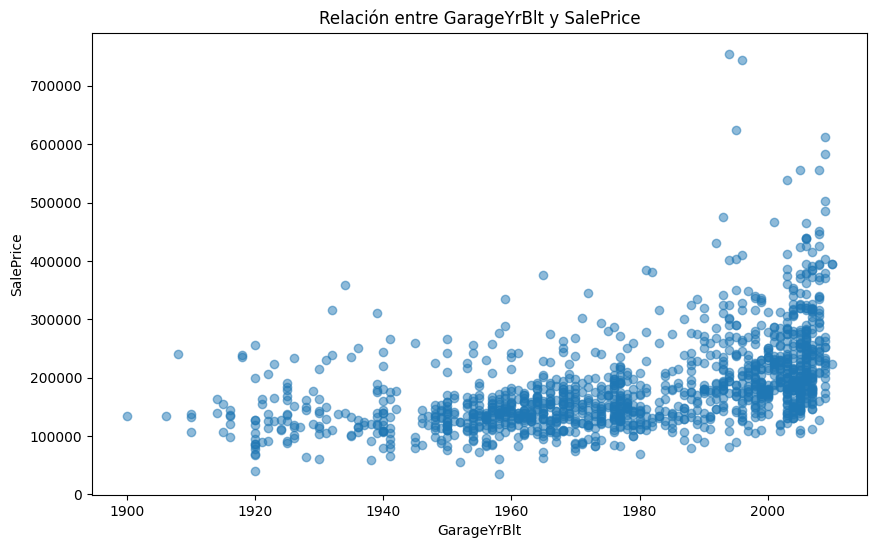

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(df['GarageYrBlt'], df['SalePrice'], alpha=0.5)
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.title('Relación entre GarageYrBlt y SalePrice')
plt.show()

In [75]:
# rellenar nulos de GarageFinish, GarageQual, GarageCond con "NA" y mapear a números
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].map({
    'NA': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
})
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageQual'] = df['GarageQual'].map({ 
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['GarageCond'] = df['GarageCond'].map({
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})

In [76]:
# Convertir PavedDrive a valores numéricos
df['PavedDrive'] = df['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})

In [77]:
# reemplazar los nulos de PoolQC, Fence, MiscFeature con "NA" y mapear a números
df['PoolQC'].fillna('NA')
df['PoolQC'] = df['PoolQC'].map({
    'NA': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
})
df['Fence'].fillna('NA')
df['Fence'] = df['Fence'].map({
    'NA': 0,
    'MnWw': 1,
    'GdWo': 2,
    'MnPrv': 3,
    'GdPrv': 4
})
df['MiscFeature'].fillna('NA')
df['MiscFeature'] = df['MiscFeature'].map({
    'NA': 0,
    'Elev': 1,
    'Gar2': 2,
    'Othr': 3,
    'Shed': 4,
    'TenC': 5
})

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Para variables nominales como SaleType (tipo de transacción) y SaleCondition (condición de la venta) se aplicarán categorias poco comunes

In [79]:
print("Distribución de SaleType")
print(df['SaleType'].value_counts())
print("Distribución de SaleCondition")
print(df['SaleCondition'].value_counts())

Distribución de SaleType
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64
Distribución de SaleCondition
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


In [80]:
# --- Limpiar y agrupar SaleType ---
df['SaleType'] = df['SaleType'].replace({
    'ConLD': 'Con',
    'ConLI': 'Con',
    'ConLw': 'Con',
    'Con': 'Con',
    'CWD': 'Other',
    'Oth': 'Other'
})

# --- Limpiar y agrupar SaleCondition ---
df['SaleCondition'] = df['SaleCondition'].replace({
    'Alloca': 'Other',
    'AdjLand': 'Other',
    'Family': 'Other'
})

df = pd.get_dummies(df, columns=['SaleType', 'SaleCondition'], drop_first=True)


In [81]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

CORRELACIÓN DE VARIABLES - SELECCIÓN.

In [88]:
cols = [# Sótano
    "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinSF1",
    "BsmtFinType2", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF",

    # Interiores
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
    "BedroomAbvGr", "KitchenAbvGr", "KitchenQual",
    "TotRmsAbvGrd", "Functional",
    "Fireplaces", "FireplaceQu",

    # Garaje
    "GarageType", "GarageYrBlt", "GarageFinish",
    "GarageCars", "GarageArea",
    "GarageQual", "GarageCond",

    # Extras y Venta
    "PavedDrive", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "PoolQC", "Fence",
    "MiscFeature", "MiscVal", "MoSold", "YrSold",
    'SaleType_Con', 'SaleType_New', 'SaleType_Other', 'SaleType_WD',
       'SaleCondition_Normal', 'SaleCondition_Other', 'SaleCondition_Partial',

    # Variable objetivo
    "SalePrice"
]

corr = df[cols].corr()
corr_sorted = corr['SalePrice'].sort_values(ascending=False)
top10_vars = corr_sorted.head(5).index.tolist()


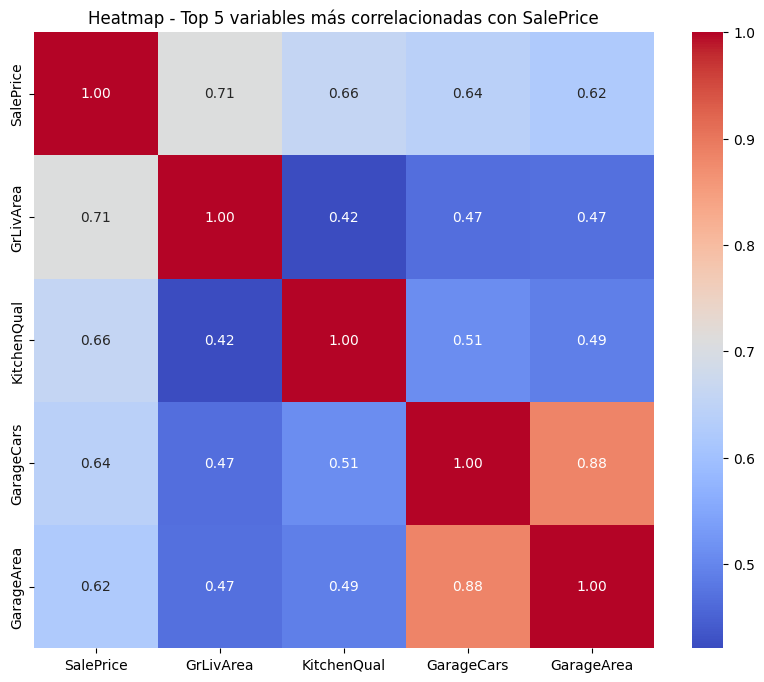

In [85]:
corr_top10 = df[top10_vars].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_top10, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap - Top 5 variables más correlacionadas con SalePrice")
plt.show()
